# Question 1.5

In [1]:
import numpy as np

In [2]:
# Dataset with and without outliers
X_no_outlier = np.array([
    [2, 3],
    [3, 4],
    [4, 5],
    [5, 6]
])

X_with_outlier = np.array([
    [2, 3],
    [3, 4],
    [4, 5],
    [5, 6],
    [100, 200]
])

# Function to compute covariance matrix
def compute_covariance_matrix(X):
    X_centered = X - np.mean(X, axis=0)
    covariance_matrix = np.cov(X_centered, rowvar=False)
    return covariance_matrix

# Compute covariance matrices
cov_no_outlier = compute_covariance_matrix(X_no_outlier)
cov_with_outlier = compute_covariance_matrix(X_with_outlier)


In [3]:
print("Covariance Matrix without Outlier:\n", cov_no_outlier)
print("Covariance Matrix with Outlier:\n", cov_with_outlier)

Covariance Matrix without Outlier:
 [[1.66666667 1.66666667]
 [1.66666667 1.66666667]]
Covariance Matrix with Outlier:
 [[1863.7 3774.4]
 [3774.4 7645.3]]


# Question 2 PCA: Food consumption in European countries

## Question 2.1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [5]:
file_path = 'data/food-consumption.csv'
data = pd.read_csv(file_path)

data.head()

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19,57,51,19,21,27,...,81,75,44,71,22,91,85,74,30,26
1,Italy,82,10,60,2,55,41,3,2,4,...,67,71,9,46,80,66,24,94,5,18
2,France,88,42,63,4,76,53,11,23,11,...,87,84,40,45,88,94,47,36,57,3
3,Holland,96,62,98,32,62,67,43,7,14,...,83,89,61,81,15,31,97,13,53,15
4,Belgium,94,38,48,11,74,37,23,9,13,...,76,76,42,57,29,84,80,83,20,5


         PC1       PC2      Country
0   1.498626  0.869827      Germany
1  -5.512976 -0.720437        Italy
2  -2.386379  3.079790       France
3   4.185848  1.866264      Holland
4  -0.740965  1.061492      Belgium
5  -1.268932  4.830416   Luxembourg
6   6.102347  4.855348      England
7  -6.436008 -1.703052     Portugal
8  -2.647303 -2.531387      Austria
9  -0.812643  2.844445  Switzerland
10  3.764901 -4.645061       Sweden
11  3.312139 -2.742752      Denmark
12  1.841034 -4.380223       Norway
13  1.368684 -5.245961      Finland
14 -5.015538  1.162078        Spain
15  2.747167  1.399211      Ireland


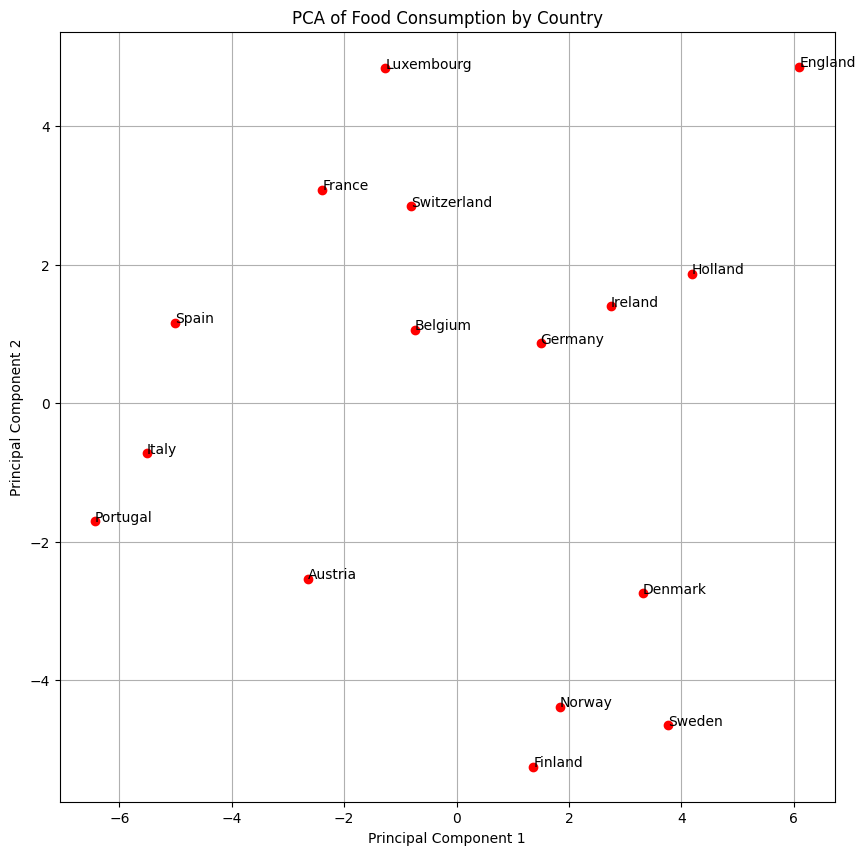

In [6]:
# Extracting the feature matrix (food consumption data) and country names
features = data.columns[1:]  # All columns except 'Country'
country_names = data['Country']

# Extract the food consumption data
food_data = data[features].values

# Mean Center the data
food_mean = np.mean(food_data, axis=0)  
X_food = food_data.T - food_mean[:, None]  

# Perform Singular Value Decomposition (SVD)
U_f, Sig_f, V_f = np.linalg.svd(X_food)  # Perform SVD on the mean-centered data
U_f = U_f.real  # Ensure U_f is real
Sig_f = Sig_f.real  # Ensure Sig_f is real

# Find dimensions using the first two principal components
dim_1 = np.dot(U_f[:, 0].T, X_food) / np.sqrt(Sig_f[0])  
dim_2 = np.dot(U_f[:, 1].T, X_food) / np.sqrt(Sig_f[1])  

# Flip the first principal component to match the desired plot orientation
dim_1 = -dim_1

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame({
    'PC1': dim_1,
    'PC2': dim_2,
    'Country': country_names
})

# Display the PCA DataFrame
print(pca_df)

# Create a scatter plot of the first two principal components
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(dim_1, dim_2, color='red')  # Plot the data points

# Add labels to the plot
for i in range(len(country_names)):
    name = country_names[i]
    ax.annotate(name, (dim_1[i], dim_2[i]))  # Annotate each point with the corresponding country name

# Set plot title and labels
ax.set_title('PCA of Food Consumption by Country')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.grid(True)

# Display the plot
plt.show()

## Question 2.2

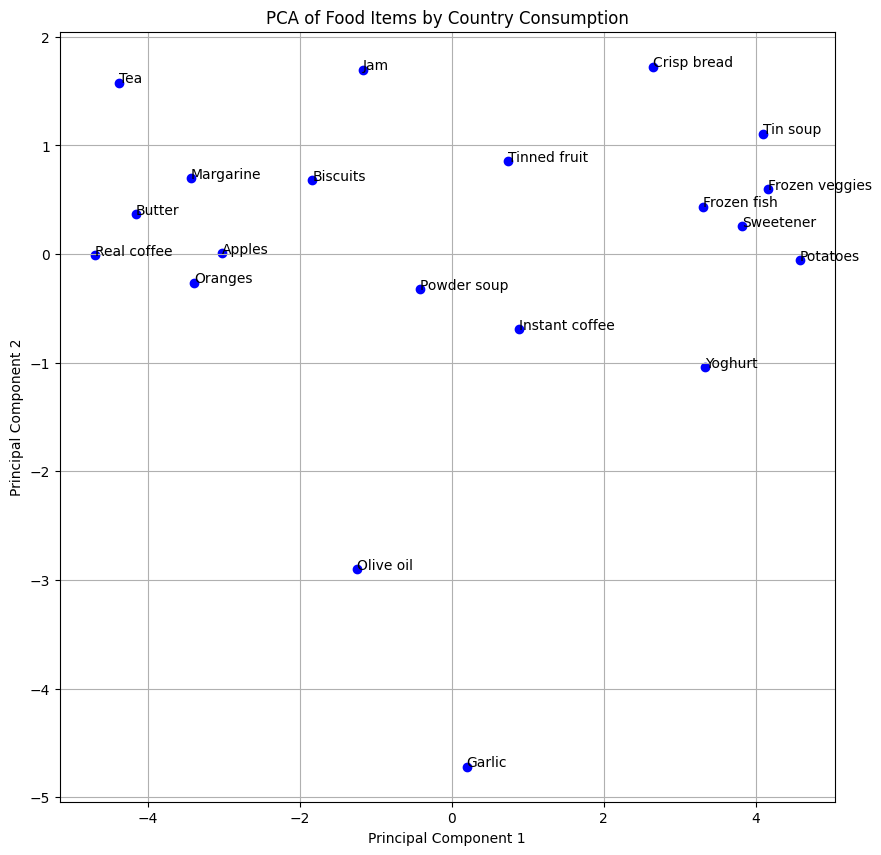

        PC1       PC2       Food Item
0 -4.698147 -0.011183     Real coffee
1  0.878491 -0.689909  Instant coffee
2 -4.376306  1.577525             Tea
3  3.826781  0.254160       Sweetener
4 -1.835353  0.678379        Biscuits


In [7]:

# Extracting the feature matrix (food consumption data) and country names
features = data.columns[1:]  # All columns except 'Country'
country_names = data['Country']

# Extract the food consumption data and transpose it
food_data = data[features].values.T

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(food_data)

# Performing PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Creating a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Food Item'] = features

# Swap the y-axis and x-axis values to flip both axes
pca_df['PC1'] = -pca_df['PC1']
pca_df['PC2'] = -pca_df['PC2']

# Plotting the scatter plot with both axes swapped
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(pca_df['PC1'], pca_df['PC2'], color='blue')

# Annotating the points with food item names
for i, food_item in enumerate(pca_df['Food Item']):
    ax.annotate(food_item, (pca_df['PC1'][i], pca_df['PC2'][i]))

# Setting the title and labels
ax.set_title('PCA of Food Items by Country Consumption')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.grid(True)

# Display the plot
plt.show()

# Displaying the PCA DataFrame
print(pca_df.head())

# Question 3 Order of faces using ISOMAP

## 3.1 Weighted adjacency matrix

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import scipy.io
from scipy.sparse import csgraph
from scipy.linalg import eigh
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.decomposition import PCA
from PIL import Image
import matplotlib.gridspec as gridspec


In [9]:
# Load the data from the .mat file
data = scipy.io.loadmat('data/isomap.mat')['images']

def distance_processor(data, lp):
    """
    Processes the distance matrix for the data using the specified norm.
    
    Args:
        data: The input data matrix where each column is an image.
        lp: The norm to use for distance calculation (1 for Manhattan, else Euclidean).
    
    Returns:
        distance_matrix: The computed pairwise distance matrix.
        d: Number of features (dimension of each image vector).
        n: Number of data points (images).
        G: The graph adjacency matrix with weighted distances.
    """
    # Get the number of features (d) and number of data points (n)
    d, n = data.shape

    # Compute pairwise distances using the specified norm
    if lp == 1:
        distance_matrix = pairwise_distances(data.T, metric='cityblock')
    else:
        distance_matrix = pairwise_distances(data.T, metric='euclidean')

    # Flatten and sort the distance matrix to determine epsilon
    distance_matrix_list = np.sort(distance_matrix.flatten())
    ids = n + 40000  # Index for selecting epsilon value
    epsilon = distance_matrix_list[ids]

    # Create adjacency matrix using the epsilon threshold
    q = distance_matrix < epsilon
    q = q | q.T  # Ensure the matrix is symmetric
    G = distance_matrix * q + 99999.9 * (1 - q)  # Use a large value for non-adjacent nodes

    return distance_matrix, d, n, G


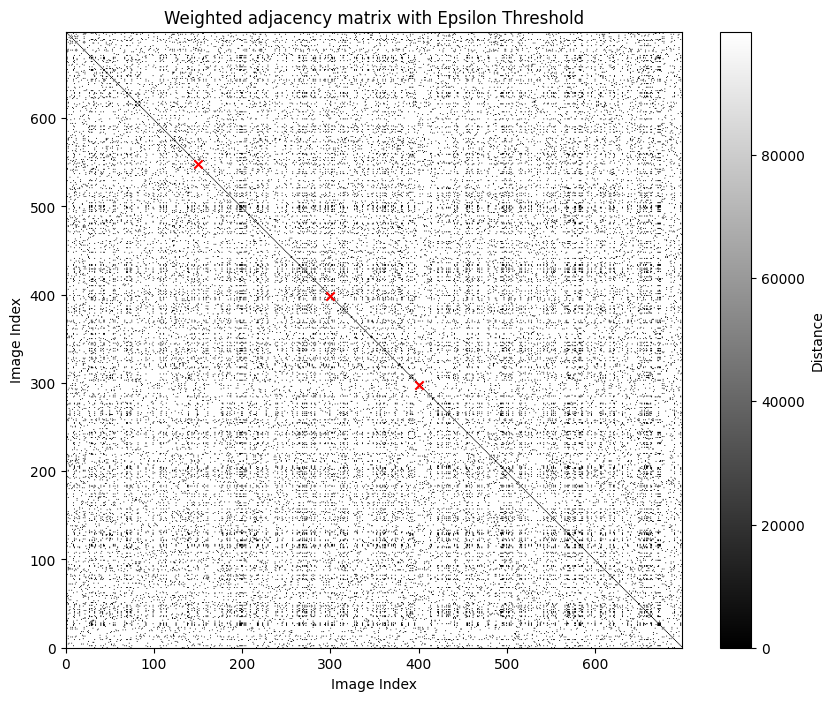

In [10]:
# Process the distances and get the adjacency matrix G
distance_matrix, d, n, G = distance_processor(data, 2)

# Plot the adjacency matrix
plt.figure(figsize=(10, 8))
plt.imshow(G, cmap='gray', extent=[0, n, 0, n])
plt.colorbar(label='Distance')
plt.title('Weighted adjacency matrix with Epsilon Threshold')
plt.xlabel('Image Index')
plt.ylabel('Image Index')

# Highlight selected images with red crosses
selected_indices = [300, 400, 150]
plt.scatter(selected_indices, [n - idx for idx in selected_indices], marker='x', color='red')

# Display the plot
plt.show()

## 3.2 Plots

### L2 Norm

In [11]:
def compute_distance_matrix(G):
    """
    1. Compute the shortest path distance matrix using the Floyd-Warshall algorithm
    2. Make the distance matrix symmetric
    """
    d = csgraph.shortest_path(G)
    # Make the distance matrix symmetric
    d = (d + d.T) / 2
    return d

# Create a centering matrix
def center_matrix(n):
    """
    1. Create a column vector of ones
    2.  Create the centering matrix H
    """
    ones = np.ones([n, 1])
    H = np.eye(n) - 1/n * ones.dot(ones.T)
    return H

# Double centering to get matrix C
def compute_matrix_C(d, n):
    """
    1.  Get the centering matrix H
    2. Compute the matrix C using double centering
    3. Ensure C is symmetric
    """
    H = center_matrix(n)
    C = -H.dot(d**2).dot(H) / (2 * n)
    C = (C + C.T) / 2
    return C

# Compute eigenvalues and eigenvectors for dimensionality reduction
def compute_embedding(C, dimensions=2):
    """
    1. Compute eigenvalues and eigenvectors
    2. Sort the eigenvalues in descending order
    3. Compute embedding coordinates
    """
    eig_val, eig_vec = eigh(C)
    eig_val = eig_val.real
    eig_vec = eig_vec.real
    # step 2
    eig_index = np.argsort(-eig_val)
    # step 3
    Z = eig_vec[:, eig_index[:dimensions]].dot(np.diag(np.sqrt(eig_val[eig_index[:dimensions]])))
    return Z

# Process the distance matrix and compute embeddings
def pairs_distances_matrix_C_processor(G, n):
    """
    1. Compute the shortest path distance matrix
    2. Compute the centered matrix C
    3. Compute the embedding coordinates
    """
    d = compute_distance_matrix(G)
    C = compute_matrix_C(d, n)
    Z = compute_embedding(C)
    return d, Z, C

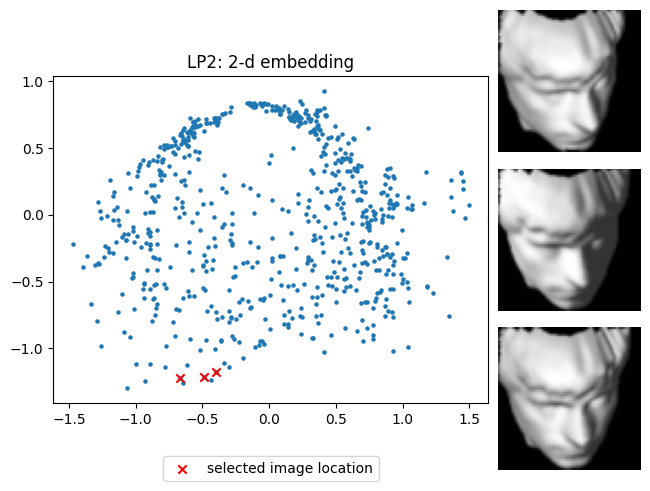

In [12]:
# Function to plot 2D embedding
def plot_embedding(Z, index):
    """
    1. Create a figure with constrained layout
    2. Create a grid specification for subplots
    3. Create the main scatter plot for 2D embedding
    """
    fig = plt.figure(constrained_layout=True)
    gs = gridspec.GridSpec(ncols=4, nrows=3, figure=fig)

    ax0 = fig.add_subplot(gs[:, :3])
    ax0.scatter(Z[:, 0], Z[:, 1], s=5)  # Plot all points
    ax0.scatter(Z[index, 0], Z[index, 1], marker='x', c='red', label='selected image location')  # Highlight selected points
    ax0.set_title('LP2: 2-d embedding')
    ax0.legend(bbox_to_anchor=(0.5, -0.2), loc='center', borderaxespad=0.1)
    ax0.set_aspect('equal')
    return fig, gs

def reshape_image(data, index):
    return np.reshape(data[:, index], [64, -1]).T

def plot_images(fig, gs, data, index):
    """
    1. Reshape images
    2. In subplots
    """
    img_1 = reshape_image(data, index[0])
    img_2 = reshape_image(data, index[1])
    img_3 = reshape_image(data, index[2])

    ax1 = fig.add_subplot(gs[0, 3])
    ax2 = fig.add_subplot(gs[1, 3])
    ax3 = fig.add_subplot(gs[2, 3])
    ax1.imshow(img_1, cmap=plt.get_cmap('gray'))
    ax1.axis('off')
    ax2.imshow(img_2, cmap=plt.get_cmap('gray'))
    ax2.axis('off')
    ax3.imshow(img_3, cmap=plt.get_cmap('gray'))
    ax3.axis('off')


d, Z, C = pairs_distances_matrix_C_processor(G, n)
index = np.argsort(Z[:, 1])[4:7]
fig, gs = plot_embedding(Z, index)
plot_images(fig, gs, data, index)

In [13]:
# # Step 1: Process pairwise distances and compute 2D embedding
# distance_matrix, d, n, G = distance_processor(data, 2)
# # Process pairwise distances and compute 2D embedding
# d, Z, C = pairs_distances_matrix_C_processor(G, n)

# # Step 2: Create a new figure and axis for the 2D manifold plot
# fig, ax = plt.subplots()

# # Step 3: Scatter plot of the 2D embeddings
# ax.scatter(Z[:, 0], Z[:, 1], s=5)
# ax.set_aspect('equal')

# # Step 4: Loop over the range of images and add them to the plot
# for aa in range(n):
#     '''
#     1. Reshape and normalize image data
#     2. Resize the image to fit the plot
#     3. Create an offset image box
#     4. Create an annotation box and add the image to the plot
#     5. Set the title and display the plot
#     '''

#     img_data = data[:, aa].reshape(64, 64).T
#     im = Image.fromarray(np.uint8(img_data * 255), mode='L')
#     im.thumbnail((6.4, 6.4))  # Resize the image to fit the plot
#     imbox = OffsetImage(im, zoom=1.0, cmap='gray')
#     ab = AnnotationBbox(imbox, (Z[aa, 0], Z[, 1]), frameon=False)
#     ax.add_artist(ab)
#     ax.set_title('LP2: 2-d manifold, All images')

# plt.show()

### L1 Norm

In [14]:
# # Step 1: Process pairwise distances and compute 2D embedding
# distance_matrix, d, n, G = distance_processor(data, 1)
# # Process pairwise distances and compute 2D embedding
# d, Z, C = pairs_distances_matrix_C_processor(G, n)

# # Step 2: Create a new figure and axis for the 2D manifold plot
# fig, ax = plt.subplots()

# # Step 3: Scatter plot of the 2D embeddings
# ax.scatter(Z[:, 0], Z[:, 1], s=5)
# ax.set_aspect('equal')

# # Step 4: Loop over the range of images and add them to the plot
# for bb in range(n):
#     '''
#     1. Reshape and normalize image data
#     2. Resize the image to fit the plot
#     3. Create an offset image box
#     4. Create an annotation box and add the image to the plot
#     5. Set the title and display the plot
#     '''

#     img_data = data[:, bb].reshape(64, 64).T
#     im = Image.fromarray(np.uint8(img_data * 255), mode='L')
#     im.thumbnail((6.4, 6.4))  # Resize the image to fit the plot
#     imbox = OffsetImage(im, zoom=1.0, cmap='gray')
#     ab = AnnotationBbox(imbox, (Z[bb, 0], Z[bb, 1]), frameon=False)
#     ax.add_artist(ab)
#     ax.set_title('LP1: 2-d manifold, All images')

# plt.show()

## 3.3

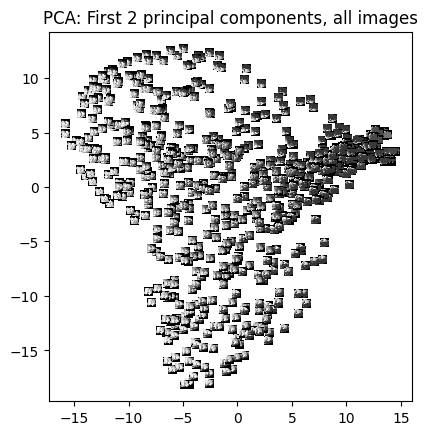

In [15]:
# Define the PCA processor function
def PCA_processor(data):
    ''' 
    1. Apply PCA using sklearn
    2. Project the data onto the top 2 eigenvectors to get the PCA result
    '''
    pca = PCA(n_components=2)
    Zpca = pca.fit_transform(data.T)
    return Zpca

# Apply PCA to the data
Zpca = PCA_processor(data)
# Invert the PCA result for visualization purposes
Zpca2 = Zpca * -1

# Create a new figure and axis for the PCA plot
figpca, axpca = plt.subplots()

# Scatter plot of the PCA results
axpca.scatter(Zpca2[:, 0], Zpca2[:, 1], s=8)
axpca.set_aspect('equal')

# Loop over the range of images and add them to the plot
for cc in range(n):
    img_data = data[:, cc].reshape(64, 64)
    img = Image.fromarray((img_data * 255).astype('uint8'), 'L')
    img = OffsetImage(img, cmap='gray', zoom=0.1)
    ab = AnnotationBbox(img, (Zpca2[cc, 0], Zpca2[cc, 1]), frameon=False)
    axpca.add_artist(ab)
    axpca.set_title('PCA: First 2 principal components, all images')

plt.show()

# Question 4 Density estimation: Psychological experiments

## 4.1 

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

In [17]:
# Load the dataset
file_path = 'data/n90pol.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,amygdala,acc,orientation
0,0.0051,-0.0286,2
1,-0.0674,0.0007,3
2,-0.0257,-0.0110,3
3,0.0504,-0.0167,2
4,0.0125,-0.0005,5


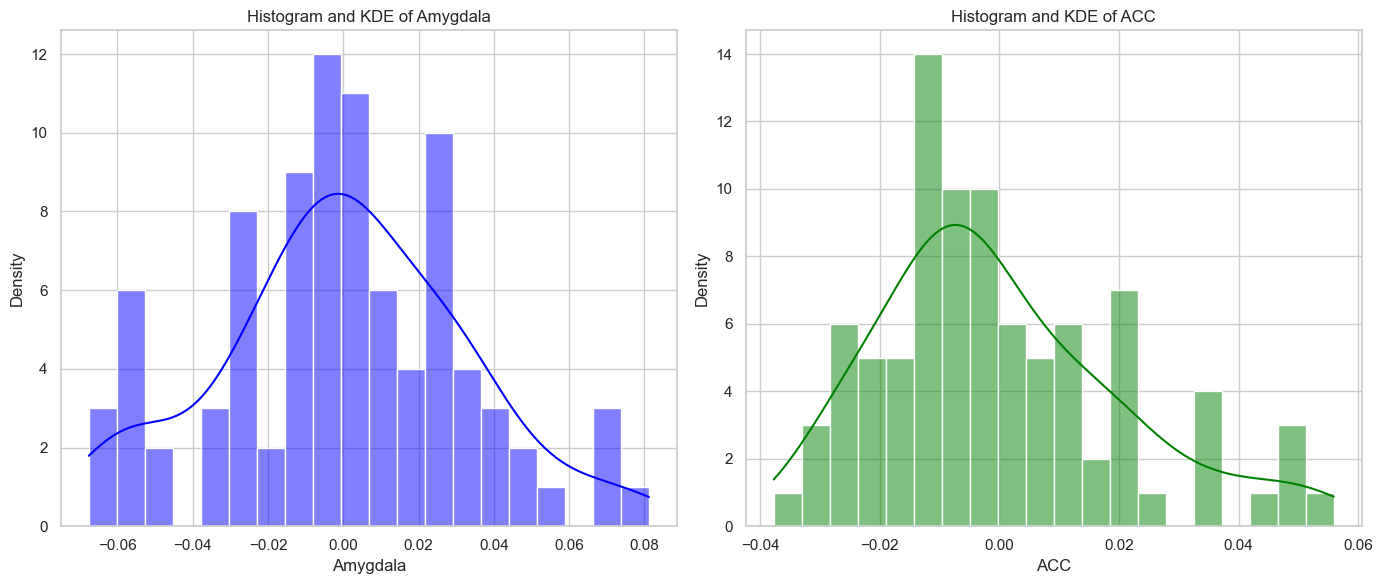

In [18]:
# Set up the plotting environment
sns.set(style="whitegrid")

# Plot the 1-dimensional histogram and KDE for amygdala
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data['amygdala'], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Histogram and KDE of Amygdala')
axes[0].set_xlabel('Amygdala')
axes[0].set_ylabel('Density')

# Plot the 1-dimensional histogram and KDE for acc
sns.histplot(data['acc'], bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title('Histogram and KDE of ACC')
axes[1].set_xlabel('ACC')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

## 4.2

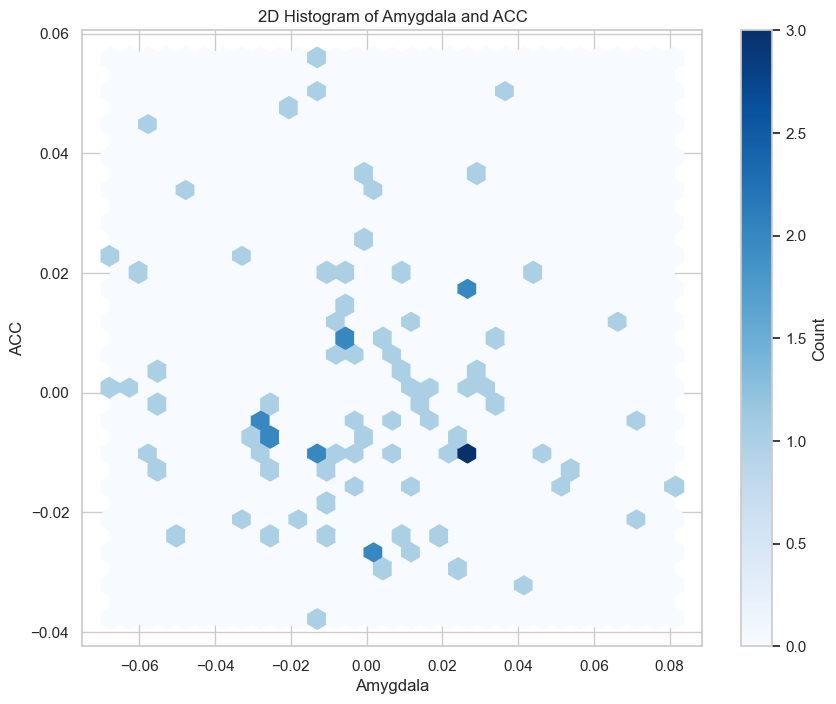

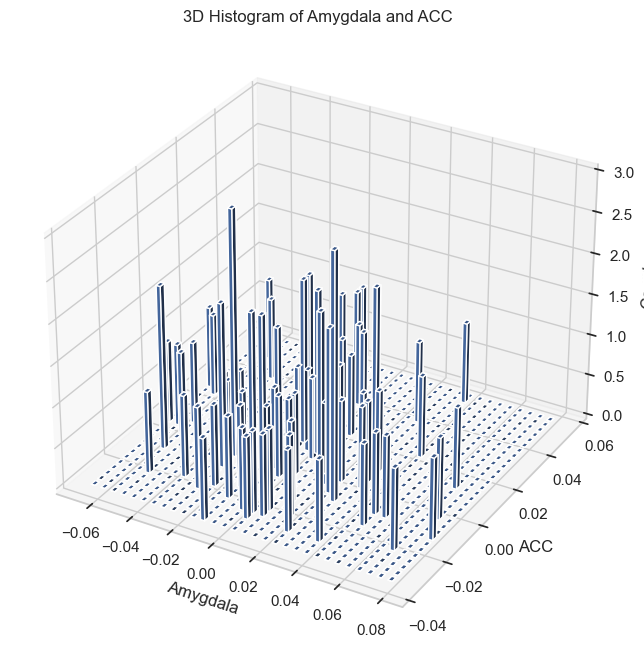

In [19]:
# Prepare data for 2D histogram
x = data['amygdala']
y = data['acc']

# 2D histogram
fig, ax = plt.subplots(figsize=(10, 8))
hb = ax.hexbin(x, y, gridsize=30, cmap='Blues')
cb = fig.colorbar(hb, ax=ax, label='Count')
ax.set_title('2D Histogram of Amygdala and ACC')
ax.set_xlabel('Amygdala')
ax.set_ylabel('ACC')
plt.show()

# 3D histogram
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=30)

# Construct arrays for the anchor positions of the bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.001, yedges[:-1] + 0.001, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the bars.
dx = dy = 0.002 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', cmap='viridis')

ax.set_title('3D Histogram of Amygdala and ACC')
ax.set_xlabel('Amygdala')
ax.set_ylabel('ACC')
ax.set_zlabel('Count')

plt.show()

## 4.3

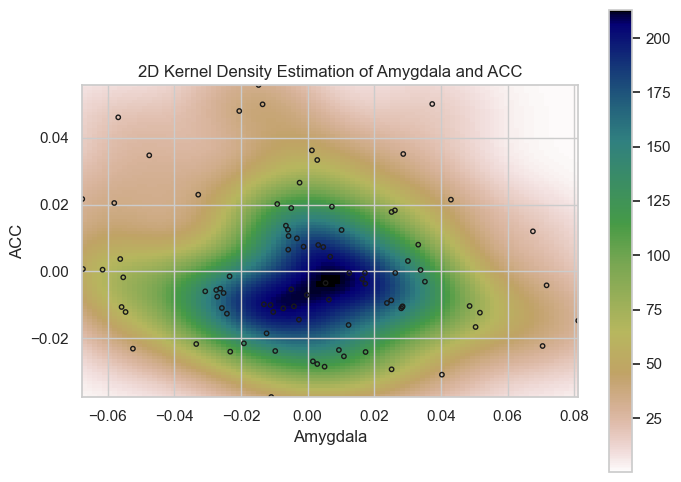

In [20]:
# Extract the relevant columns
amygdala = data['amygdala']
acc = data['acc']

# Perform 2D KDE
values = np.vstack([amygdala, acc])
kernel = gaussian_kde(values, bw_method='scott')
xmin, xmax = amygdala.min(), amygdala.max()
ymin, ymax = acc.min(), acc.max()
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kernel(positions).T, X.shape)

# Plot the 2D KDE
plt.figure(figsize=(8, 6))
plt.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
plt.colorbar()
plt.scatter(amygdala, acc, s=10, facecolors='none', edgecolors='k')
plt.title('2D Kernel Density Estimation of Amygdala and ACC')
plt.xlabel('Amygdala')
plt.ylabel('ACC')
plt.show()


## 4.4 

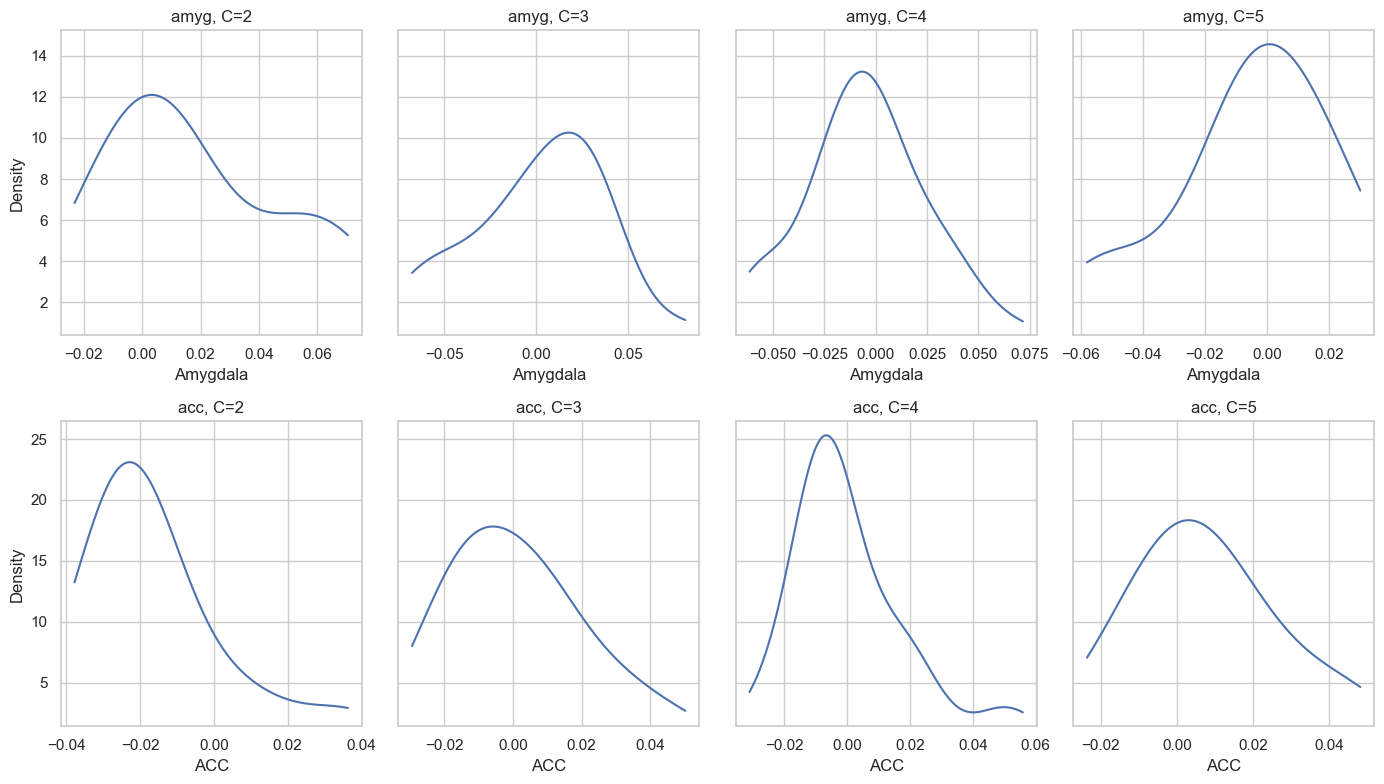

In [21]:
# Create combined 1D KDE plots for amygdala and acc conditional on political orientation
# Define the orientation levels
orientation_levels = sorted(data['orientation'].unique())

fig, axes = plt.subplots(2, len(orientation_levels), figsize=(14, 8), sharey='row')

for i, orientation in enumerate(orientation_levels):
    subset = data[data['orientation'] == orientation]
    amygdala_subset = subset['amygdala']
    acc_subset = subset['acc']
    
    # KDE for amygdala
    kde_amygdala = gaussian_kde(amygdala_subset, bw_method='scott')
    x_amygdala = np.linspace(amygdala_subset.min(), amygdala_subset.max(), 100)
    axes[0, i].plot(x_amygdala, kde_amygdala(x_amygdala))
    axes[0, i].set_title(f'amyg, C={orientation}')
    axes[0, i].set_xlabel('Amygdala')
    
    # KDE for acc
    kde_acc = gaussian_kde(acc_subset, bw_method='scott')
    x_acc = np.linspace(acc_subset.min(), acc_subset.max(), 100)
    axes[1, i].plot(x_acc, kde_acc(x_acc))
    axes[1, i].set_title(f'acc, C={orientation}')
    axes[1, i].set_xlabel('ACC')

# Set common y-axis labels
axes[0, 0].set_ylabel('Density')
axes[1, 0].set_ylabel('Density')

plt.tight_layout()
plt.show()


In [22]:
# Display the conditional sample means in a tabular format
conditional_means = data.groupby('orientation').mean()

# Print the results in a readable format
conditional_means_display = conditional_means.reset_index()
conditional_means_display = round(conditional_means_display, 4)
conditional_means_display



,orientation,amygdala,acc
0,2,0.0191,-0.0148
1,3,0.0006,0.0017
2,4,-0.0047,0.0013
3,5,-0.0057,0.0081


## 4.5

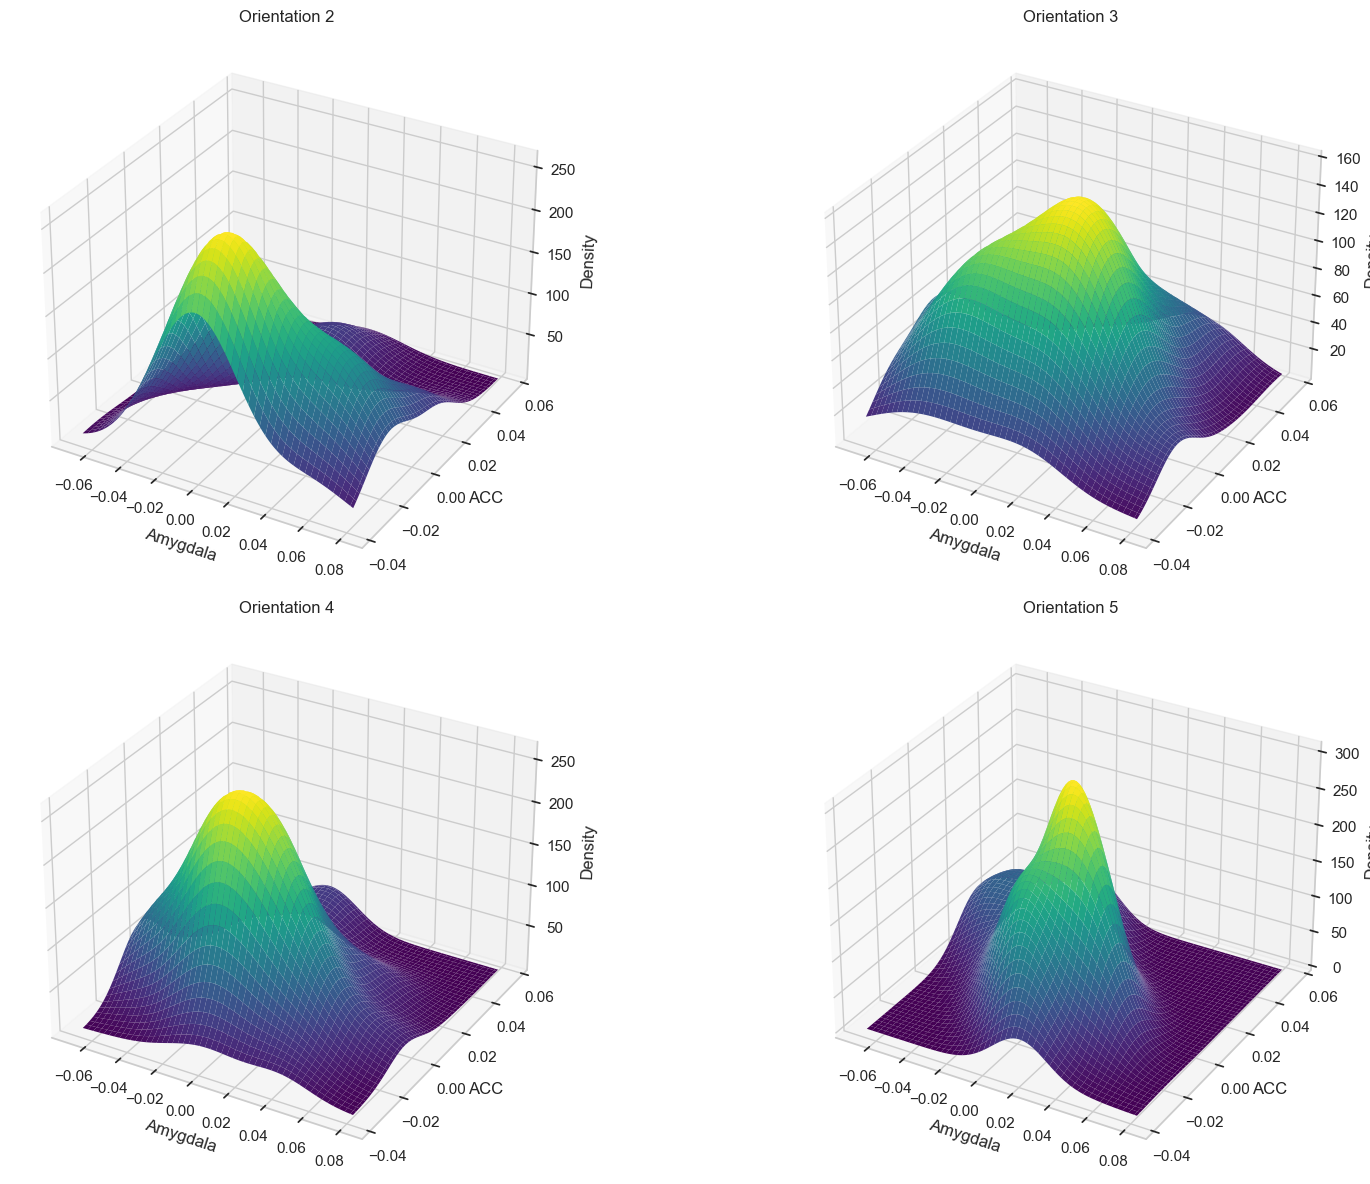

In [23]:
# Define a function to plot 3D KDE
def plot_3d_kde(data, ax, orientation):
    subset = data[data['orientation'] == orientation]
    values_subset = np.vstack([subset['amygdala'], subset['acc']])
    kernel_subset = gaussian_kde(values_subset, bw_method='scott')
    Z_subset = np.reshape(kernel_subset(positions).T, X.shape)

    # Plot the surface
    X_plot, Y_plot = np.meshgrid(X, Y)
    ax.plot_surface(X, Y, Z_subset, cmap='viridis', edgecolor='none')
    ax.set_title(f'Orientation {orientation}')
    ax.set_xlabel('Amygdala')
    ax.set_ylabel('ACC')
    ax.set_zlabel('Density')

# Create 3D plots for each political orientation
fig = plt.figure(figsize=(18, 12))

for i, orientation in enumerate(orientation_levels, 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    plot_3d_kde(data, ax, orientation)

plt.tight_layout()
plt.show()


# Question 5 Eigenfaces and simple face recognition

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA

Original shape: (243, 320), Downsampled shape: (61, 80)
Original shape: (243, 320), Downsampled shape: (61, 80)
Original shape: (243, 320), Downsampled shape: (61, 80)
Original shape: (243, 320), Downsampled shape: (61, 80)
Original shape: (243, 320), Downsampled shape: (61, 80)
Original shape: (243, 320), Downsampled shape: (61, 80)
Original shape: (243, 320), Downsampled shape: (61, 80)
Original shape: (243, 320), Downsampled shape: (61, 80)
Original shape: (243, 320), Downsampled shape: (61, 80)
Original shape: (243, 320), Downsampled shape: (61, 80)
Original shape: (243, 320), Downsampled shape: (61, 80)
Original shape: (243, 320), Downsampled shape: (61, 80)
Original shape: (243, 320), Downsampled shape: (61, 80)
Original shape: (243, 320), Downsampled shape: (61, 80)
Original shape: (243, 320), Downsampled shape: (61, 80)
Original shape: (243, 320), Downsampled shape: (61, 80)
Original shape: (243, 320), Downsampled shape: (61, 80)
Original shape: (243, 320), Downsampled shape: (

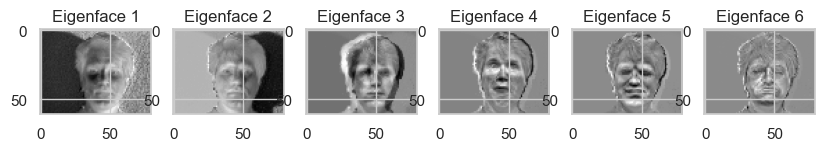

Eigenfaces for Subject 2:


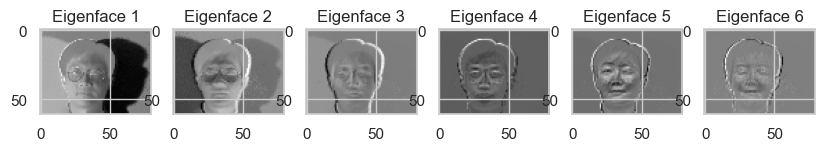

Original shape: (243, 320), Downsampled shape: (61, 80)
Original shape: (243, 320), Downsampled shape: (61, 80)
Original shape: (243, 320), Downsampled shape: (61, 80)
Original shape: (243, 320), Downsampled shape: (61, 80)
s_11: 761.4147314575033, s_12: 5955.853817014392, s_21: 5782.413651427794, s_22: 323.4192322679454
Test image 1 is closer to Subject 1
Test image 2 is closer to Subject 2


In [25]:

# Paths to images for Subject 1 and Subject 2
images_subject1_paths = [
    'data/yalefaces/subject01.glasses.gif',
    'data/yalefaces/subject01.happy.gif',
    'data/yalefaces/subject01.leftlight.gif',
    'data/yalefaces/subject01.noglasses.gif',
    'data/yalefaces/subject01.normal.gif',
    'data/yalefaces/subject01.rightlight.gif',
    'data/yalefaces/subject01.sad.gif',
    'data/yalefaces/subject01.sleepy.gif',
    'data/yalefaces/subject01.surprised.gif',
    'data/yalefaces/subject01.wink.gif'
]

images_subject2_paths = [
    'data/yalefaces/subject02.glasses.gif',
    'data/yalefaces/subject02.happy.gif',
    'data/yalefaces/subject02.leftlight.gif',
    'data/yalefaces/subject02.noglasses.gif',
    'data/yalefaces/subject02.normal.gif',
    'data/yalefaces/subject02.rightlight.gif',
    'data/yalefaces/subject02.sad.gif',
    'data/yalefaces/subject02.sleepy.gif',
    'data/yalefaces/subject02.wink.gif'
]

# Function to load images
def load_images(image_paths):
    images = []
    for path in image_paths:
        img = Image.open(path).convert('L')  # Convert to grayscale
        images.append(np.array(img))
    return images

# Function to preprocess image
def preprocess_image(image, downsample_factor=4):
    downsampled_image = image[::downsample_factor, ::downsample_factor]
    print(f"Original shape: {image.shape}, Downsampled shape: {downsampled_image.shape}")
    vectorized_image = downsampled_image.flatten()
    return vectorized_image

# Function to compute PCA
def compute_pca(images, n_components=6, downsample_factor=4):
    loaded_images = load_images(images)
    data_matrix = np.array([preprocess_image(img, downsample_factor) for img in loaded_images])
    mean_image = np.mean(data_matrix, axis=0)
    centered_matrix = data_matrix - mean_image
    pca = PCA(n_components=n_components)
    pca.fit(centered_matrix)
    eigenfaces = pca.components_
    return eigenfaces, mean_image

# Compute eigenfaces for each subject
eigenfaces_subject1, mean_image_subject1 = compute_pca(images_subject1_paths)
eigenfaces_subject2, mean_image_subject2 = compute_pca(images_subject2_paths)

correct_shape = (61, 80)  # Based on downsampling the original shape

# Function to visualize eigenfaces
def visualize_eigenfaces(eigenfaces, correct_shape):
    plt.figure(figsize=(10, 5))
    for i, eigenface in enumerate(eigenfaces):
        plt.subplot(1, len(eigenfaces), i + 1)
        plt.imshow(eigenface.reshape(correct_shape), cmap='gray')
        plt.title(f'Eigenface {i+1}')
    plt.show()

print("Eigenfaces for Subject 1:")
visualize_eigenfaces(eigenfaces_subject1, correct_shape)
print("Eigenfaces for Subject 2:")
visualize_eigenfaces(eigenfaces_subject2, correct_shape)

# Function to compute projection residual
def projection_residual(test_image, eigenfaces, mean_image, downsample_factor=4):
    test_image_vectorized = preprocess_image(np.array(test_image), downsample_factor)
    test_image_centered = test_image_vectorized - mean_image
    residual = test_image_centered - np.dot(eigenfaces.T, np.dot(eigenfaces, test_image_centered))
    return np.linalg.norm(residual)

# Example test images (Replace with actual test images)
test_image1 = Image.open('data/yalefaces/subject01.normal.gif').convert('L')
test_image2 = Image.open('data/yalefaces/subject02.normal.gif').convert('L')

# Compute projection residuals for test images
s_11 = projection_residual(test_image1, eigenfaces_subject1, mean_image_subject1)
s_12 = projection_residual(test_image1, eigenfaces_subject2, mean_image_subject2)
s_21 = projection_residual(test_image2, eigenfaces_subject1, mean_image_subject1)
s_22 = projection_residual(test_image2, eigenfaces_subject2, mean_image_subject2)

# Print the scores
print(f"s_11: {s_11}, s_12: {s_12}, s_21: {s_21}, s_22: {s_22}")

# Face recognition logic
def recognize_face(s_11, s_12, s_21, s_22):
    if s_11 < s_12:
        print("Test image 1 is closer to Subject 1")
    else:
        print("Test image 1 is closer to Subject 2")

    if s_21 < s_22:
        print("Test image 2 is closer to Subject 1")
    else:
        print("Test image 2 is closer to Subject 2")

recognize_face(s_11, s_12, s_21, s_22)

In [26]:
def downsample_image(image, factor=4):
    width, height = image.size
    return image.resize((width // factor, height // factor), Image.LANCZOS)

def vectorize_image(image):
    return np.array(image).flatten()

def calculate_mean_image(images):
    return np.mean(images, axis=0)

def eigenfaces(images, num_components):
    mean_image = calculate_mean_image(images)
    centered_images = images - mean_image
    covariance_matrix = np.cov(centered_images, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    top_eigenvectors = eigenvectors[:, sorted_indices[:num_components]]
    return top_eigenvectors, mean_image

def projection_residual(test_image, eigenfaces, mean_image):
    centered_image = test_image - mean_image
    projections = eigenfaces.T @ centered_image
    reconstruction = eigenfaces @ projections
    residual = np.linalg.norm(centered_image - reconstruction) ** 2
    return residual

# Define the paths to the test images
test_image1_path = 'data/yalefaces/subject01-test.gif'
test_image2_path = 'data/yalefaces/subject02-test.gif'

# Load and process the test images
test_image1 = downsample_image(Image.open(test_image1_path).convert('L'))
test_image2 = downsample_image(Image.open(test_image2_path).convert('L'))
test_image1_vector = vectorize_image(test_image1)
test_image2_vector = vectorize_image(test_image2)

# Example:
train_images_subject1 = [vectorize_image(downsample_image(Image.open(path).convert('L'))) for path in images_subject1_paths]
train_images_subject2 = [vectorize_image(downsample_image(Image.open(path).convert('L'))) for path in images_subject2_paths]

# Calculate eigenfaces and mean images for each subject
num_components = 6
eigenfaces_subject1, mean_image_subject1 = eigenfaces(train_images_subject1, num_components)
eigenfaces_subject2, mean_image_subject2 = eigenfaces(train_images_subject2, num_components)

# Calculate projection residuals for different numbers of eigenfaces
components = [1, 2, 3, 4, 5, 6]
results = []

for n in components:
    eigenfaces_subject1_n = eigenfaces_subject1[:, :n]
    eigenfaces_subject2_n = eigenfaces_subject2[:, :n]
    
    s_11 = projection_residual(test_image1_vector, eigenfaces_subject1_n, mean_image_subject1)
    s_12 = projection_residual(test_image1_vector, eigenfaces_subject2_n, mean_image_subject2)
    s_21 = projection_residual(test_image2_vector, eigenfaces_subject1_n, mean_image_subject1)
    s_22 = projection_residual(test_image2_vector, eigenfaces_subject2_n, mean_image_subject2)
    
    results.append((n, s_11, s_12, s_21, s_22))

# Print the results
print(f"{'Components':>10} {'s_11':>10} {'s_12':>10} {'s_21':>10} {'s_22':>10}")
for result in results:
    n, s_11, s_12, s_21, s_22 = result
    print(f"{n:>10} {s_11:>10.4f} {s_12:>10.4f} {s_21:>10.4f} {s_22:>10.4f}")

# Face recognition logic: smallest residual indicates the closest match
def recognize_face(results):
    for n, s_11, s_12, s_21, s_22 in results:
        print(f"\nUsing {n} components:")
        if s_11 < s_12:
            print("Test image 1 is closer to Subject 1")
        else:
            print("Test image 1 is closer to Subject 2")

        if s_21 < s_22:
            print("Test image 2 is closer to Subject 1")
        else:
            print("Test image 2 is closer to Subject 2")

recognize_face(results)


Components       s_11       s_12       s_21       s_22
         1 6742872.4473 32746524.6021 39491807.8305 3735545.1083
         2 6183057.4747 32722164.2061 35096090.1528 3724889.2816
         3 5843920.3683 32500816.1783 34591037.9533 2303889.4487
         4 5813247.7261 32249128.0150 34272608.4077 2269497.1476
         5 5739334.5250 31934665.1167 34089623.3663 2206158.5073
         6 5679348.4437 30460607.7856 33791504.4035 1955858.0960

Using 1 components:
Test image 1 is closer to Subject 1
Test image 2 is closer to Subject 2

Using 2 components:
Test image 1 is closer to Subject 1
Test image 2 is closer to Subject 2

Using 3 components:
Test image 1 is closer to Subject 1
Test image 2 is closer to Subject 2

Using 4 components:
Test image 1 is closer to Subject 1
Test image 2 is closer to Subject 2

Using 5 components:
Test image 1 is closer to Subject 1
Test image 2 is closer to Subject 2

Using 6 components:
Test image 1 is closer to Subject 1
Test image 2 is closer to Subject